<a href="https://colab.research.google.com/github/HwayoungYoon/Data-Analysis-Practice/blob/master/bike-sharing-demand/kaggle_DS_bike_sharing_demand_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[부스트코스] 캐글 실습으로 배우는 데이터 사이언스**
## Ⅰ. 자전거 수요량 예측을 위한 탐색적 데이터 분석
https://www.edwith.org/boostcourse-ds-kaggle/lecture/57568

---

학습기간 : 2020년 07월 22일 ~ 2020년 07월 31일

---

* 출처 : 박조은 강사님 [Github](https://github.com/corazzon/KaggleStruggle/tree/master/bike-sharing-demand) 

참고 URL
* [Bike Sharing Demand | Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)
* [EDA & Ensemble Model (Top 10 Percentile) | Kaggle](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile)

# **데이터 파일**

**Description**

train 데이터를 이용해 test 데이터의 count 예측
* train.csv : 도시의 키오스크로 자전거를 대여한 기록에 대한 데이터셋
* test.csv : train.csv에서 casual, registered, count column을 제외한 데이터셋

**Data Fields**
* datetime(날짜) : hourly date + timestamp
* season(계절) : 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday(휴일) : whether the day is considered a holiday
* workingday(근무일) : whether the day is neither a weekend nor holiday
* weather(날씨)
  1. Clear, Few clouds, Partly cloudy, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp(온도) : temperature in Celsius
* atemp(체감온도) : "feels like" temperature in Celsius
* humidity(습도) : relative humidity
* windspeed(풍속) : wind speed
* casual(등록되지 않은 사용자) : number of non-registered user rentals initiated
* registered(등록된 사용자) : number of registered user rentals initiated
* count(총 대여수) : number of total rentals

**평가 방법**

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as 
![대체 텍스트](https://ifh.cc/g/msVaU1.png)

***
bike sharing demand는 지도 학습(supervised learning)과 비지도 학습(unsupervised learning) 중 지도 학습, 분류(classification)와 회귀(regression) 중 회귀와 관련된 문제
 
- 자전거 대여량을 예측하는 문제이기 때문
- 특정한 상황에 대한 count값이 있기 때문

In [1]:
# Google Drive와 Colab 연동
# 실행 후 나오는 URL 접속하여 authorization code 받기
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd gdrive/My Drive/bike-sharing-demand/data

/content/gdrive/My Drive/bike-sharing-demand/data


# **Evaluation**

## **1) library import 및 환경설정**

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자를 이용해 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 해결
mpl.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Colab 사용자용 Matplotlib 한글깨짐 문제 해결**

In [4]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
# 나눔고딕 경로 확인하기
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'NanumGothic.ttf' in f]
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf']

In [5]:
# 경로 가져오기
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [6]:
fm._rebuild()

In [7]:
from IPython.display import set_matplotlib_formats

# Windows의 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

* 런타임 다시 시작 후 나눔고딕 설치를 제외하고 전부 재실행

## **2) 데이터 가져오기 및 확인**

In [8]:
# train 데이터를 가져온 후 행, 열의 갯수 확인
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

**▼ Study Point!**

```
pd.read_csv("data.csv", parse_dates=["column name"])
```
데이터를 불러올 때 parse_dates 옵션을 사용하면 해당 column을 datetime 형식으로 불러옴

* train 데이터는 10886개의 row과 12개의 column으로 이루어져 있다.

In [ ]:
# traine데이터의 column별 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


**▼ Study Point!**

```
.columns
.dtypes
.info()
```
.columns는 데이터의 column만 가져옴

.dtypes는 데이터의 column별 데이터타입만 가져옴

.info()는 데이터의 column별 Not-Null의 갯수, 데이터타입 등의 정보 가져옴

In [ ]:
# 상위 5개 데이터 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* windspeed column의 경우 0.0의 값을 갖는 데이터가 많은 것으로 보인다. 이는 결측값을 0.0으로 채웠다고 볼 수 있을 수도 있다. 따라서 windspeed가 0.0인 데이터를 feature engineering 해주는 방식에 따라 다른 결과가 나올 수 있다.

In [ ]:
# train 데이터에서 null인 값이 있는지 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


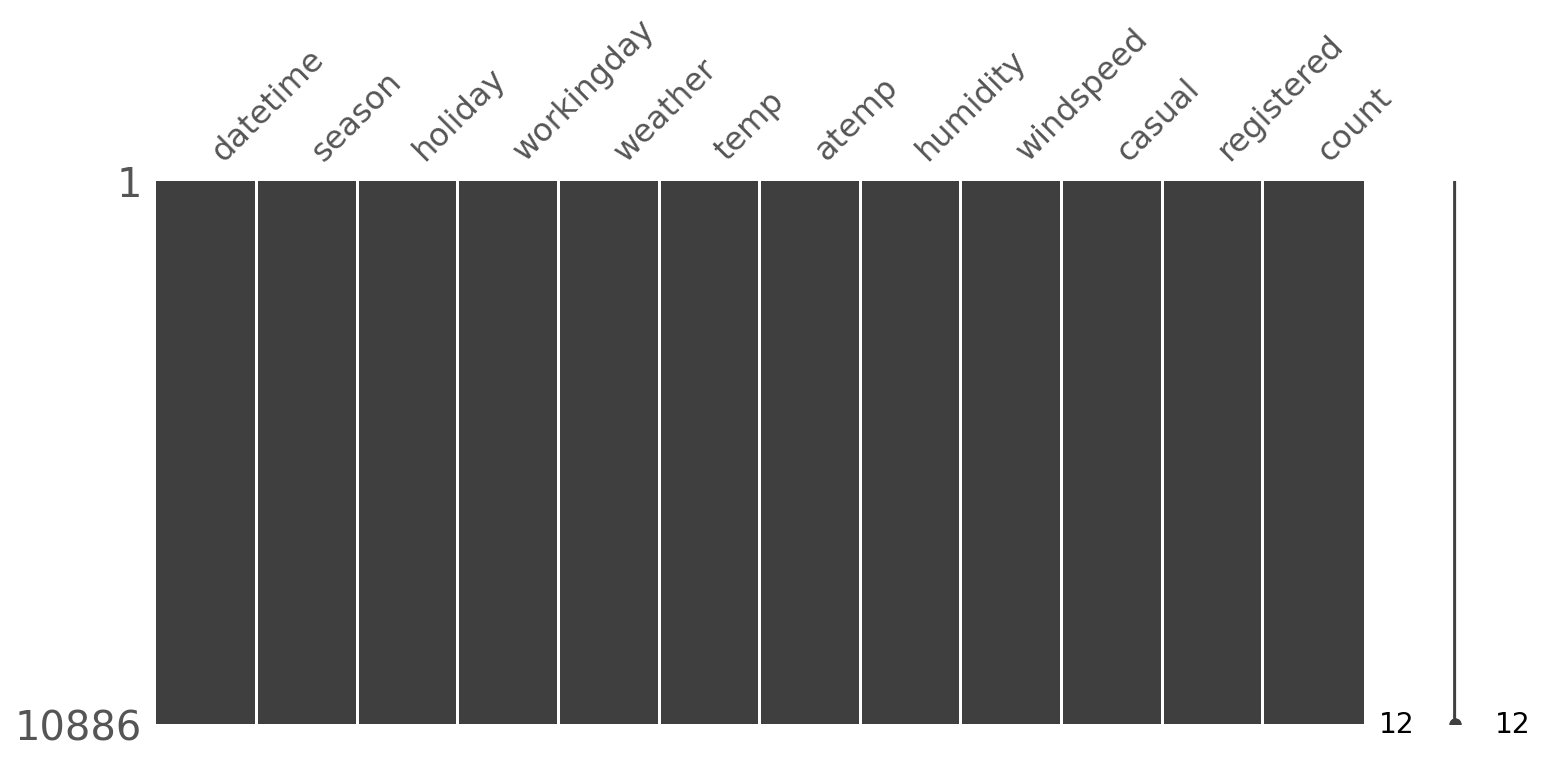

In [ ]:
# train 데이터에서 null인 값이 있는지 시각화
import missingno as msno

msno.matrix(train, figsize=(12,5))

* null인 데이터는 하나도 없다.

## **3) datetime column 분할**

In [9]:
# datetime column을 분할하여 year, month, day, hour, minute, second column 생성
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

* 기존 12개의 column에서 6개가 추가되어 18개로 변한 것을 확인할 수 있다.

In [ ]:
# 상위 5개 데이터 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'second'), Text(0.5, 1.0, '초별 대여량')]

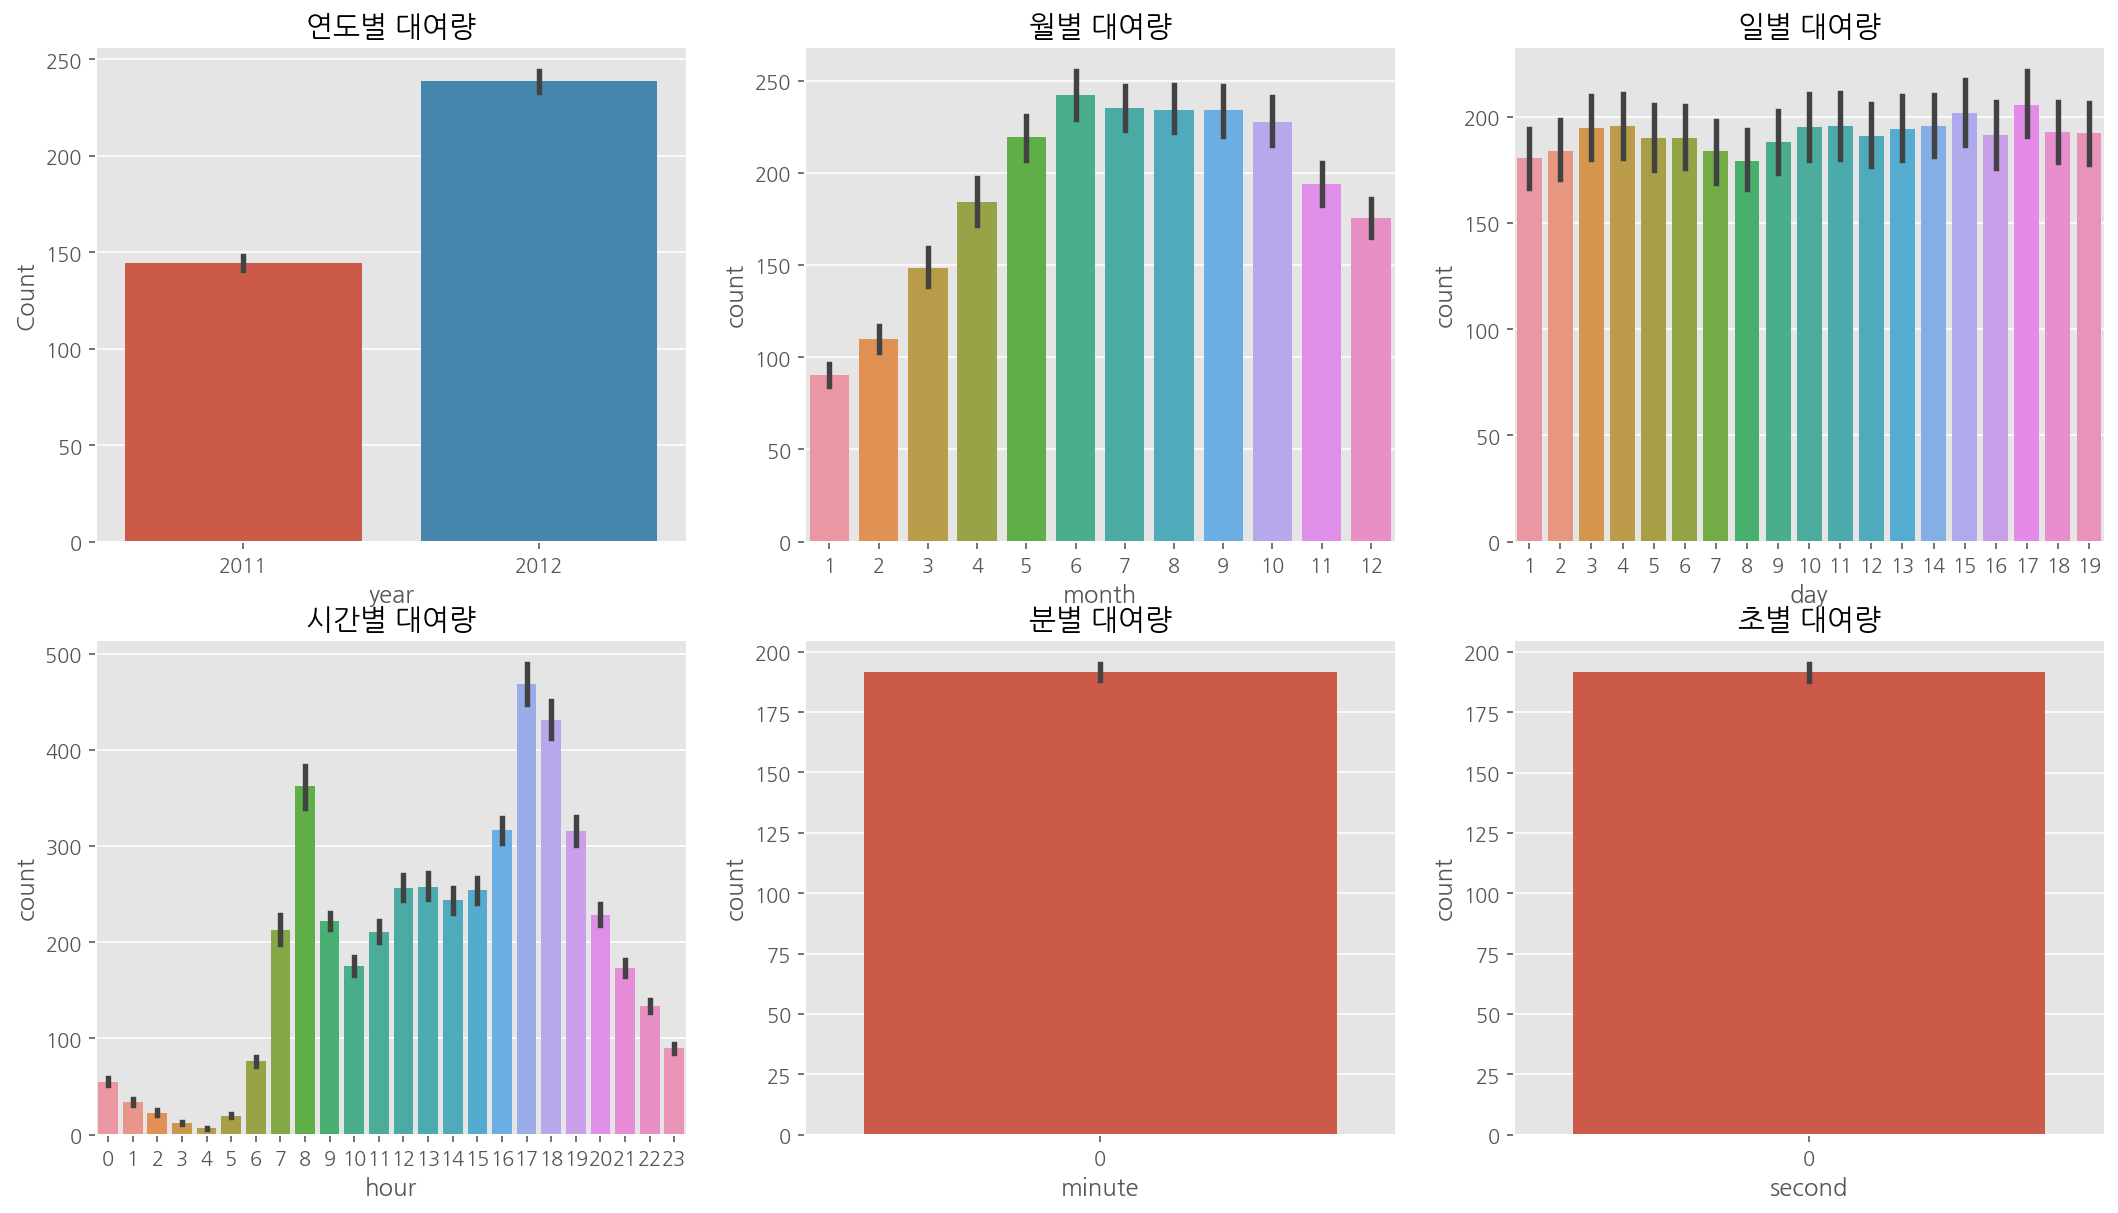

In [ ]:
# 연도별, 월별, 일별, 시간별 대여량 시각화
## barplot 사용
## 2개의 행과 3개의 열을 가지도록 함
## x축은 각각의 시간 값, y축은 각각의 count 값을 가짐
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,10)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")
ax5.set(xlabel='minute', title="분별 대여량")
ax6.set(xlabel='second', title="초별 대여량")

* 연도별 대여량은 2011년보다 2012년이 더 많다.
* 월별 대여량은 6월에 가장 많고 그 다음으로는 7~9월, 10월 순으로 대여량이 많다. 그리고 1월에 가장 적다. 날씨가 추울 때보다 따뜻할 때 대여량이 더 많음을 볼 수 있다.
* 일별 대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 참고는 가능하겠지만 피처로 사용할 수 없다.
* 시간별 대여량을 보면 출퇴근 시간에 대여량이 많은 것으로 보여지고, 새벽 시간대는 대여량이 적다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
* 분, 초는 모든 값이 0이기 때문에 의미가 없다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

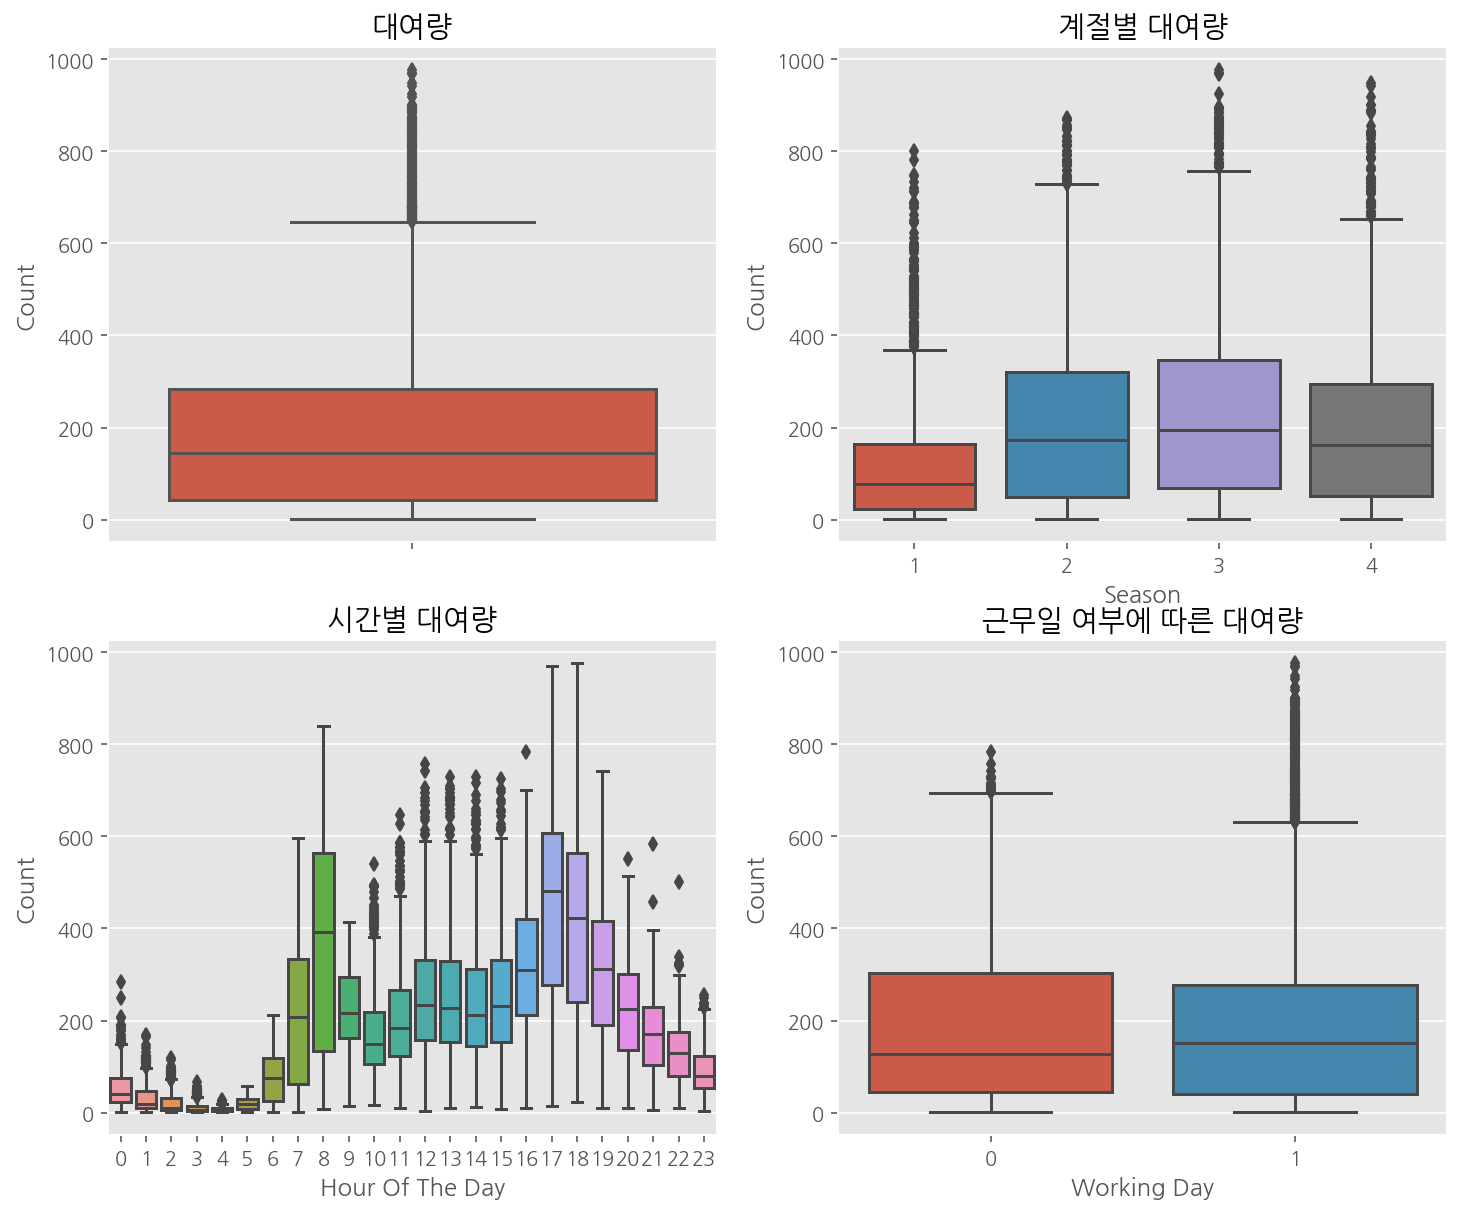

In [ ]:
# 계절별, 시간별, 근무일 여부에 따른 대여량 시각화
## boxplot 사용
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="대여량")
axes[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

* 전체 대여량의 경우 특정 구간에 몰려있는 것을 볼 수 있다.
* 계절별 대여량은 순서대로 봄(1), 여름(2), 가을(3), 겨울(4)을 나타낸다. 봄에 대여량이 가장 적으며, 여름과 가을에 대여량이 많다.
* 시간별 대여량은 barplot과 유사한 형태를 보인다.
* 근무일 여부에 따른 대여량은 큰 차이를 보이지는 않는다. 그러나 근무일(0)보다는 휴일(1)에 대여량이 조금 더 많은 것으로 보인다.

In [10]:
# dayofweek column 추가 후 행, 열의 갯수 확인
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

* 기존 18개의 column에서 1개가 추가되어 19개로 변한 것을 확인할 수 있다.

In [11]:
# dayofweek column에 대한 value counts
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

* 0~6은 각각 월요일부터 일요일까지를 나타낸다. 요일별로 큰 차이가 있지는 않은 것으로 보인다.

[Text(0.5, 1.0, '계절에 따른 시간대별 대여량')]

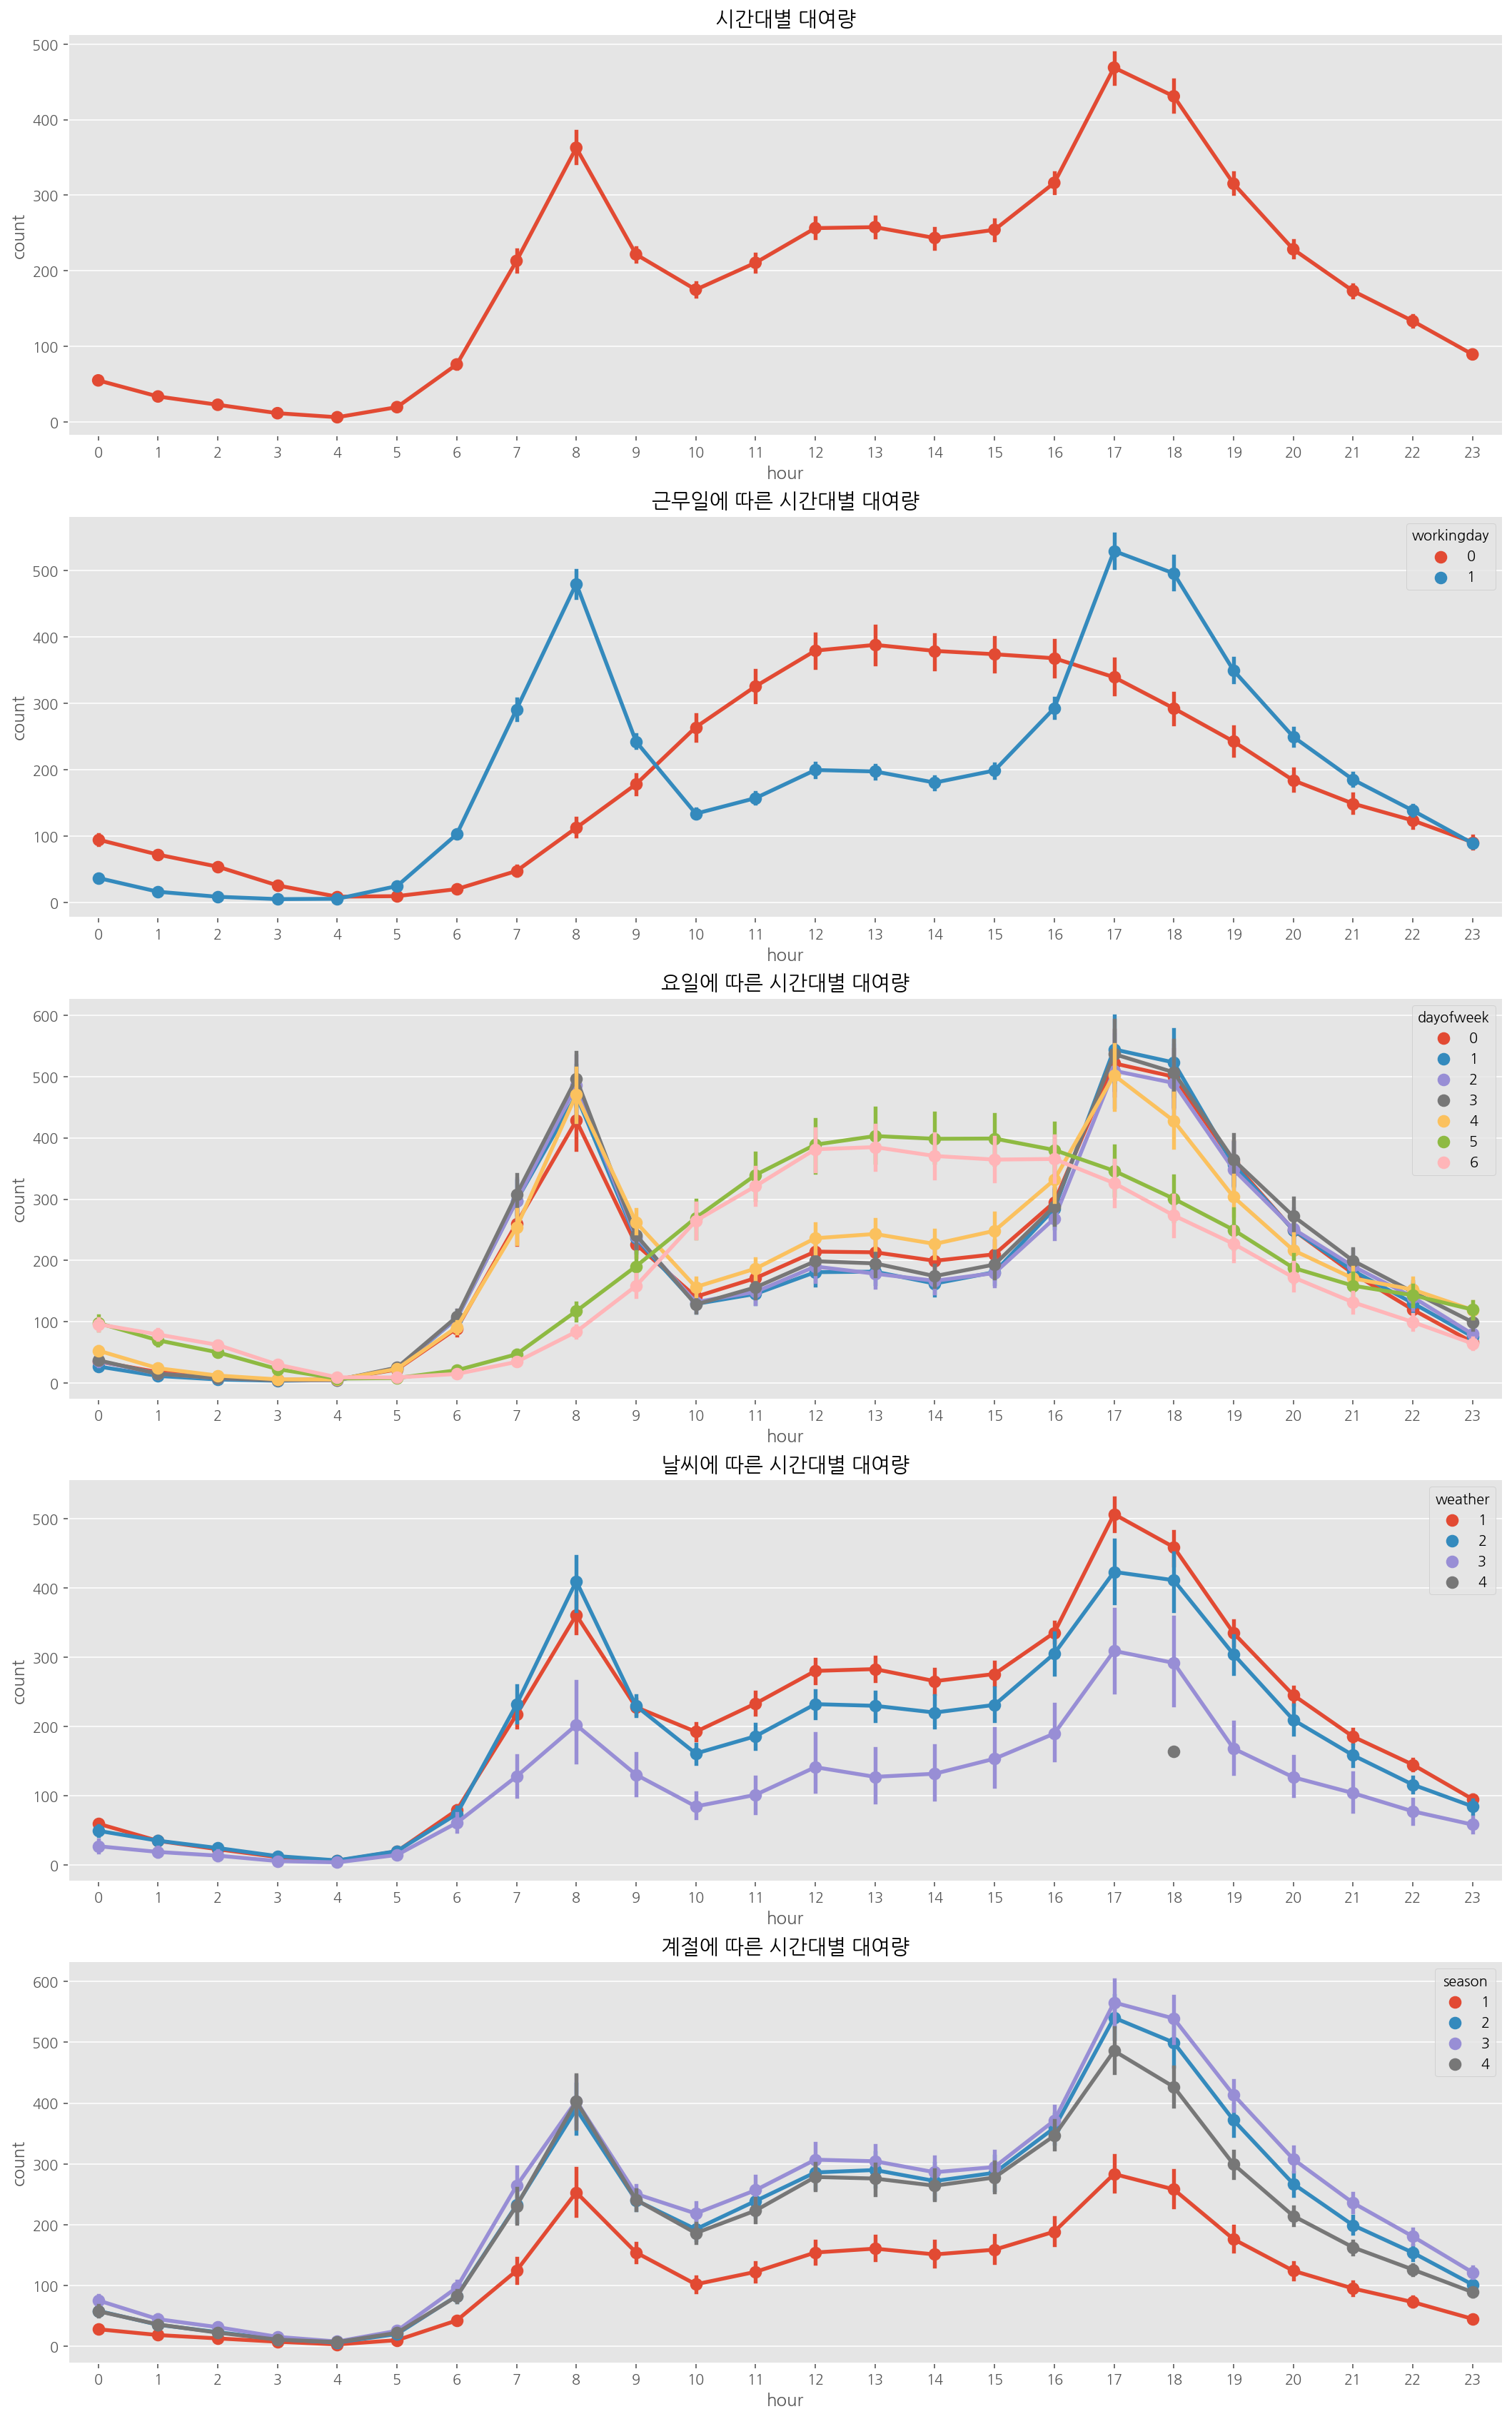

In [15]:
# 근무일, 요일, 날씨, 계절에 따른 시간대별 대여량 시각화
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,30)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

ax1.set(title="시간대별 대여량")
ax2.set(title="근무일에 따른 시간대별 대여량")
ax3.set(title="요일에 따른 시간대별 대여량")
ax4.set(title="날씨에 따른 시간대별 대여량")
ax5.set(title="계절에 따른 시간대별 대여량")

* 대부분의 경우 조건에 상관없이 출퇴근 시간에 대여가 많은 것으로 보인다.
* 그러나 근무일 여부에 따른 대여량을 봤을 때 근무일(1)에는 출퇴근 시간에 대여가 많은 것을 볼 수 있지만 근무일이 아닌 경우(0)에는 11시부터 5시까지 점심시간과 오후시간에 걸쳐 대여가 많은 것을 볼 수 있다.
* 요일에 따른 대여량 역시 근무일 여부와 마찬가지의 결과를 보인다.
* 날씨에 따른 대여량에서 1은 날씨가 좋은 경우이고, 4는 날씨가 가장 나쁜 경우이다. 날씨에 따른 시간별 대여량은 큰 차이를 보이지는 않지만 날씨가 좋을수록 대여량이 많음을 알 수 있다.
* 계절에 따른 대여량은 큰 차이를 보이지는 않지만 봄(1)에 대여량이 가장 적음을 알 수 있다.

In [16]:
# 온도, 사용자 등록 여부, 습도, 풍속과 대여량 사이의 상관관계
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


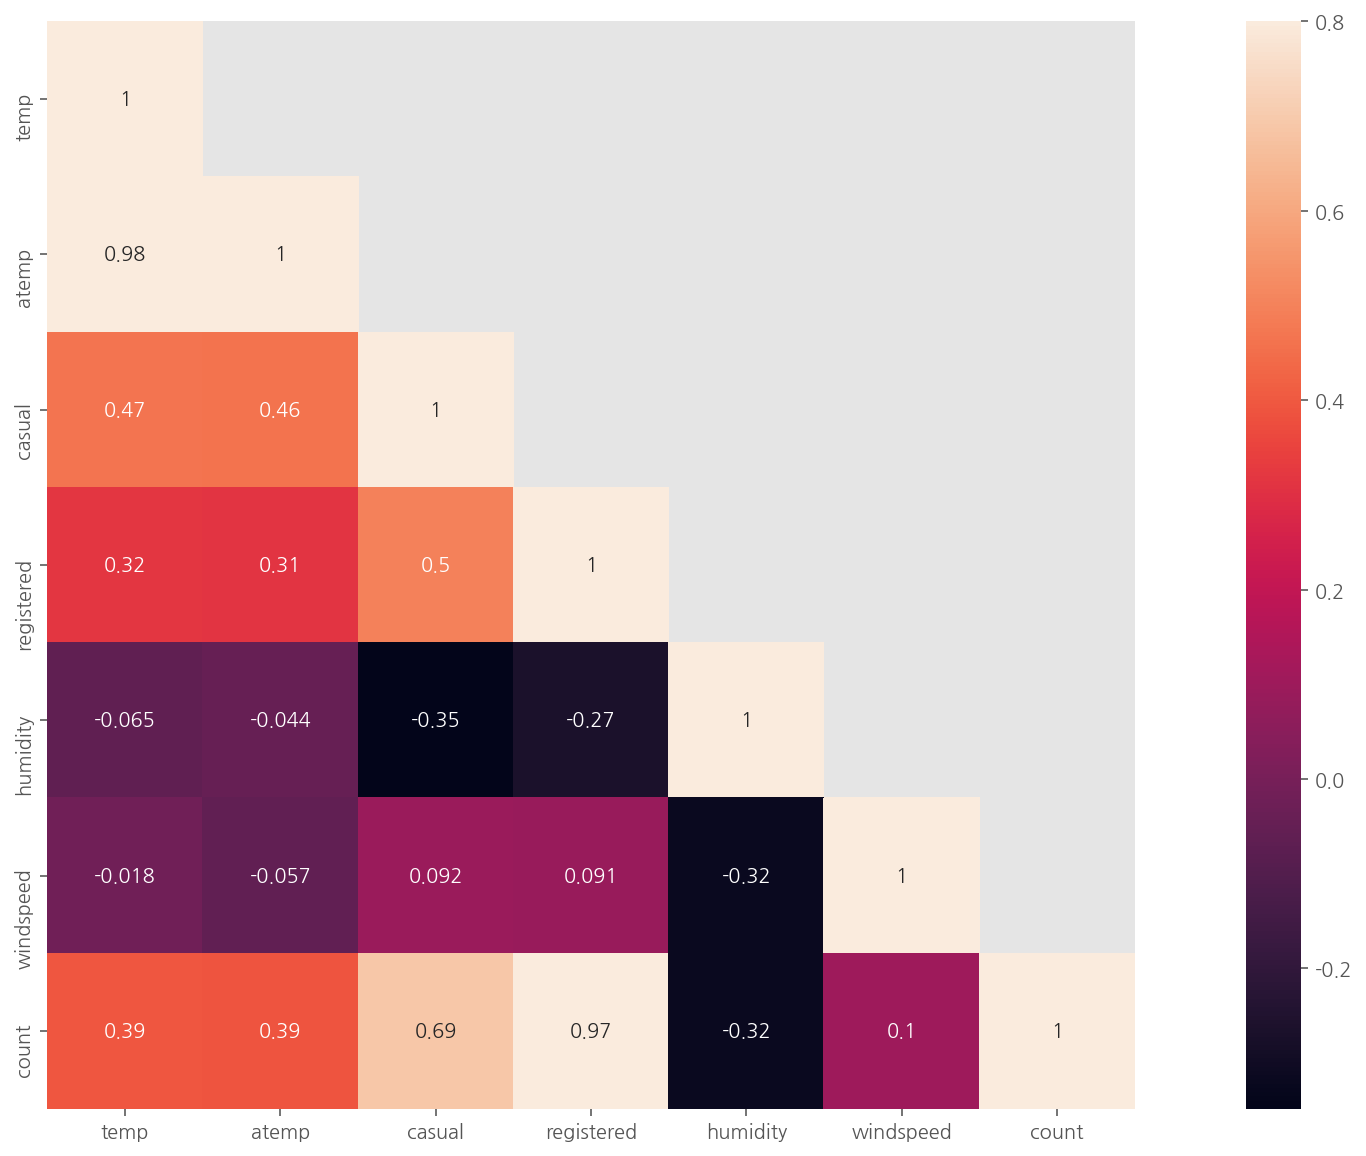

In [17]:
# 온도, 사용자 등록 여부, 습도, 풍속과 대여량 사이의 상관관계 시각화
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

* 온도(temp, atemp)와 습도(humidity), 풍속(windspeed)은 상관관계가 낮다.
* 대여량과 가장 상관관계가 높은 건 등록된 사용자(registered)이지만, train 데이터에만 존재하기 때문에 피처로 사용하기 어렵다.
* 온도(temp)와 체감온도(temp)는 0.98로 상관관계가 높지만 같은 데이터로 보여지므로 피처로 사용하기에 적합하지 않을 수 있다.

[Text(0.5, 1.0, '습도별 대여량')]

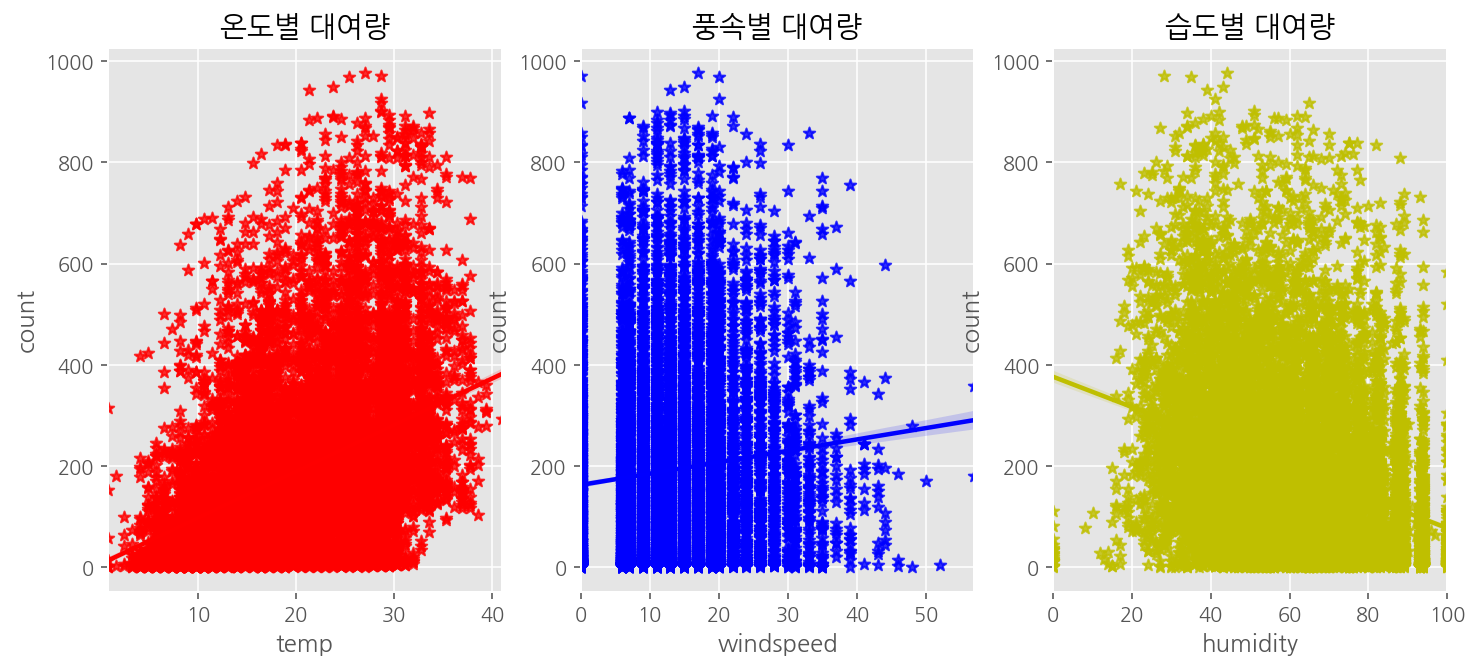

In [26]:
# 온도별, 풍속별, 습도별 대여량 시각화
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", color="r", marker="*", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", color="b", marker="*", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", color="y", marker="*", data=train, ax=ax3)

ax1.set(title="온도별 대여량")
ax2.set(title="풍속별 대여량")
ax3.set(title="습도별 대여량")

* 풍속의 경우 0에 데이터가 몰려 있는 것으로 보인다. 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해 본다.
* 습도의 경우 0과 100에 일부 데이터가 몰려 있는 것으로 보인다.

In [27]:
# 연도와 월을 합친 column year_month 생성
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


[Text(0.5, 1.0, '연도+월별 대여량')]

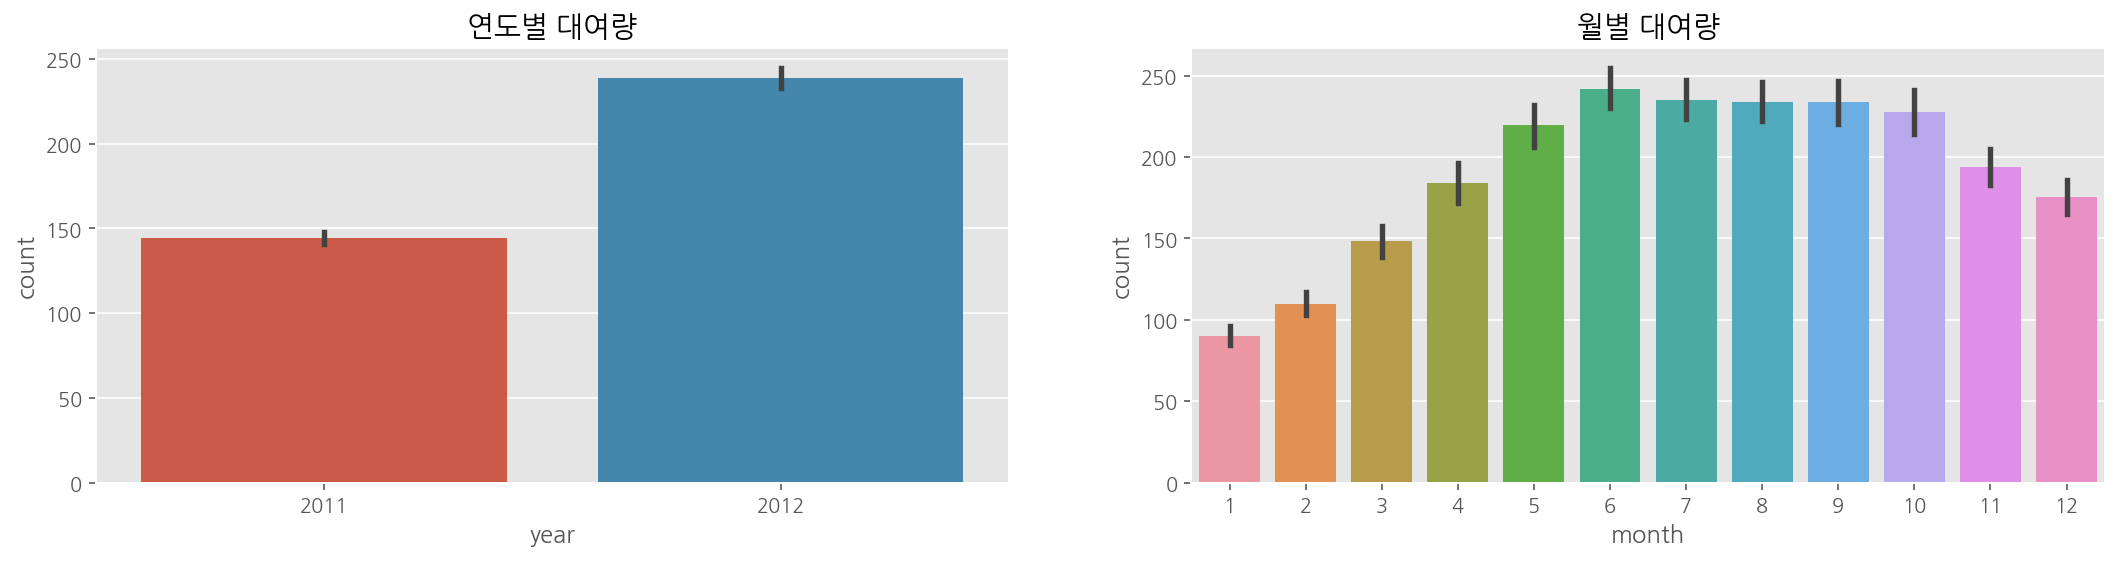

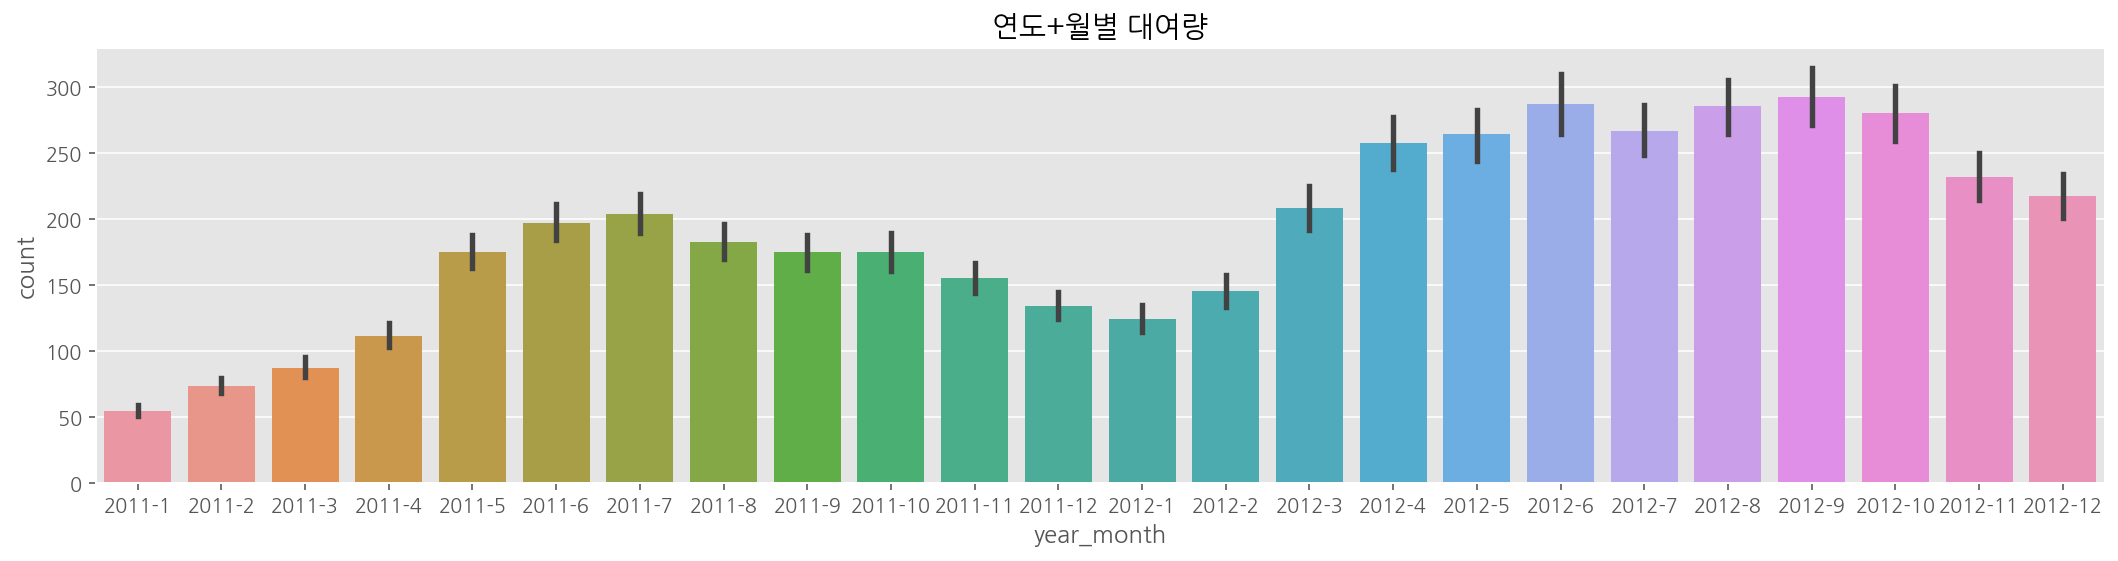

In [28]:
# 연도, 월별 대여량 시각화
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

ax3.set(title="연도+월별 대여량")

* 2011년보다 2012년의 대여량이 더 많다.
* 겨울보다는 여름에 대여량이 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다. 동일한 월을 연도별로 비교했을 때 평균적으로 2012년의 대여량이 2011년의 대여량의 1.5배 가까이 된다.

In [29]:
# Outliers 데이터 제거
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


* 10886개의 데이터에서 147개의 Outliers 데이터를 제거하여 10739개의 데이터를 얻었다.

[Text(0.5, 1.0, 'Outliers를 제거한 데이터의 대여량')]

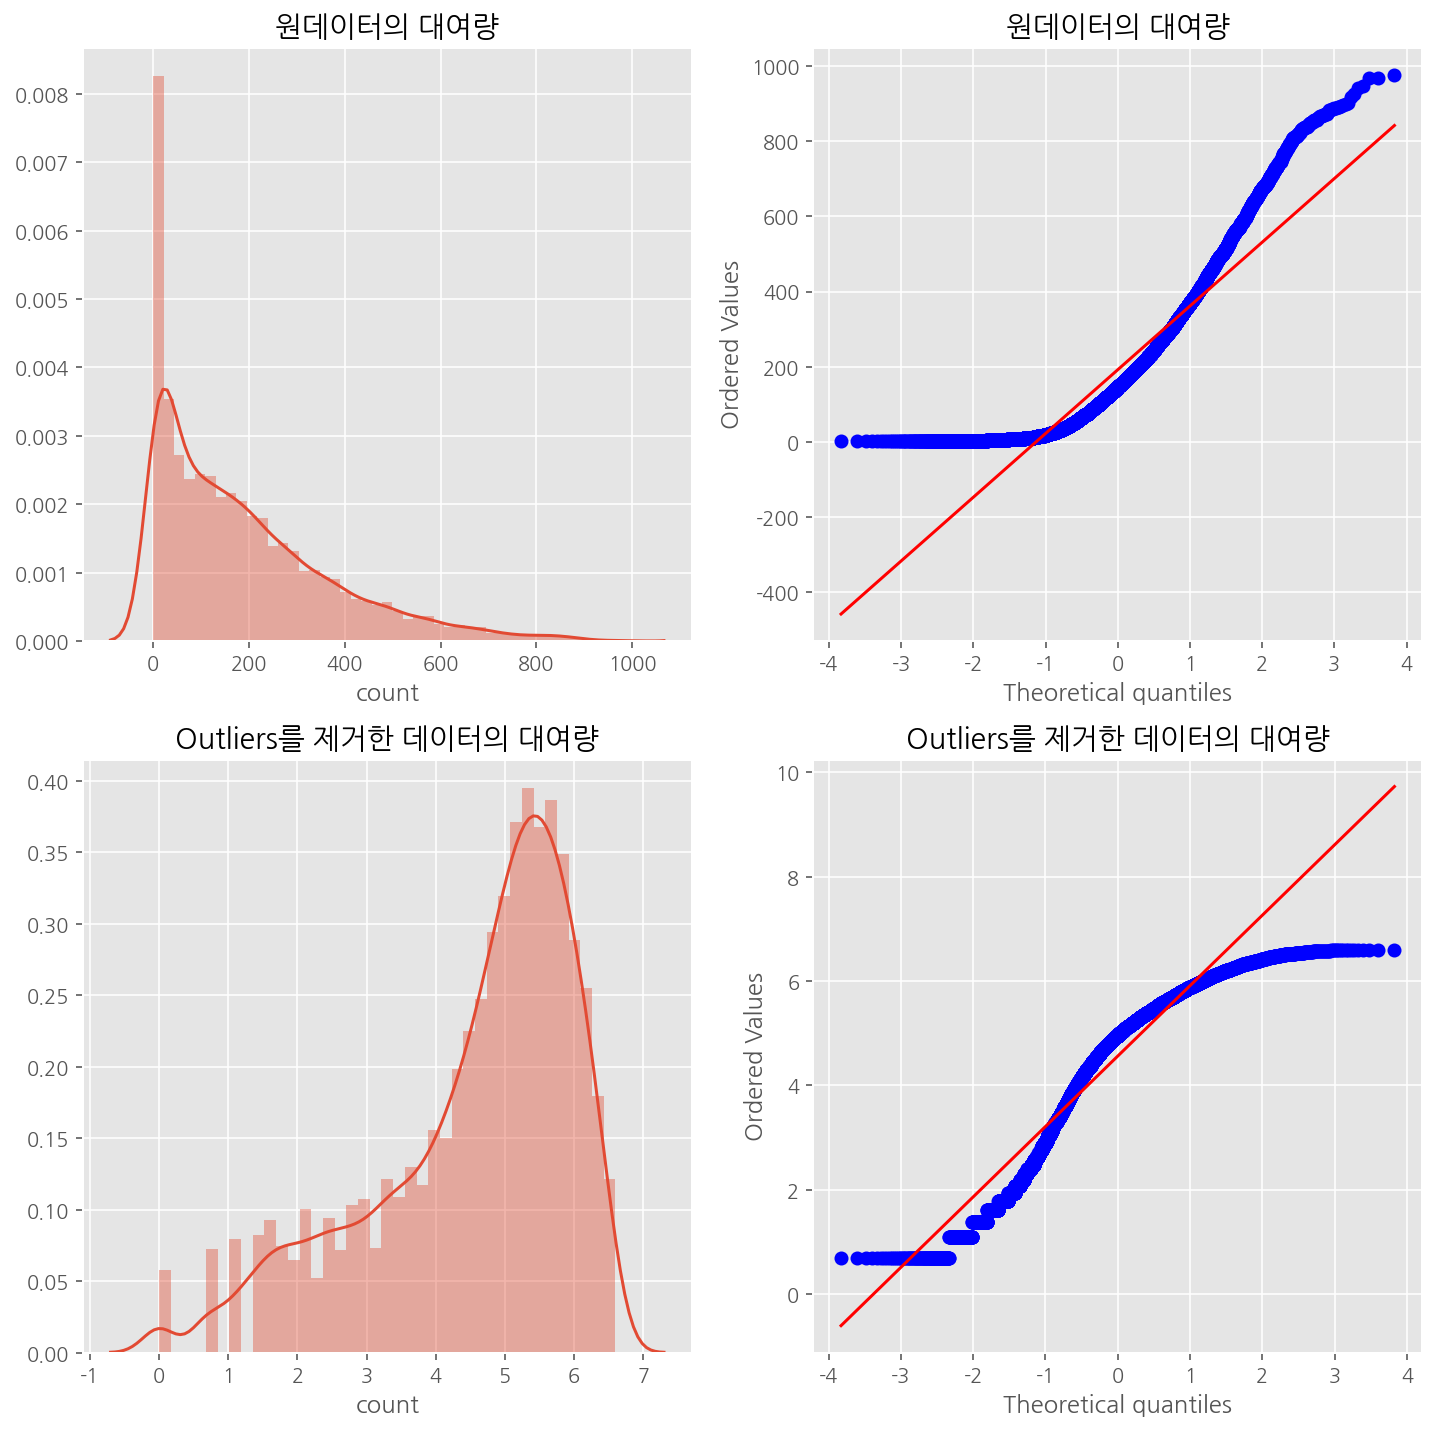

In [30]:
# 원데이터와 Outliers를 제거한 데이터의 대여량의 분포도
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 12)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

axes[0][0].set(title="원데이터의 대여량")
axes[0][1].set(title="원데이터의 대여량")
axes[1][0].set(title="Outliers를 제거한 데이터의 대여량")
axes[1][1].set(title="Outliers를 제거한 데이터의 대여량")

* 0의 값을 갖던 데이터를 제거한 후 대여량의 분포는 원데이터보다는 자세하게 나타나지만 오른쪽으로 치우쳐 있다. 대부분의 기계학습은 종속변수가 normal이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않는다.